In [1]:
# get data
import pandas as pd

data = pd.read_csv('data/clusters.csv')
data.head()

,A,B,C
0,-0.087492,0.398000,0.014275
1,-1.071705,-0.546473,0.072424
2,2.747075,2.012649,3.083964
3,3.217913,2.213772,4.260312
4,-0.607273,0.793914,-0.516091


In [2]:
# normalize the numeric features to make them on the same scale
# get 2 principal components
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaled_data = MinMaxScaler().fit_transform(data[data.columns[0:2]])

pca = PCA(n_components = 2).fit(scaled_data)
data_2d = pca.transform(scaled_data)
data_2d[0:10]

array([[ 0.3145124 , -0.05531718],
       [ 0.53766685, -0.05993373],
       [-0.19870478,  0.08589647],
       [-0.27609658,  0.11711494],
       [ 0.32757379, -0.16128549],
       [ 0.33697255, -0.06158248],
       [-0.50821462,  0.07102105],
       [-0.1805265 ,  0.10489307],
       [ 0.43967541,  0.13737133],
       [ 0.43271121,  0.01963967]])

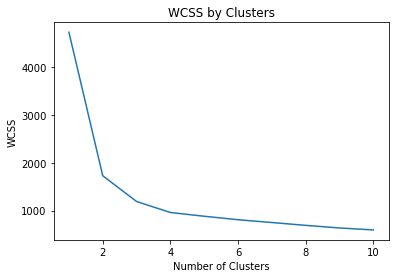

In [3]:
# to find out how many clusters to separate data into 
# and to measure tightness, a metric called within cluster sum of squares (WCSS)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(data.values)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [4]:
# create a model based on 3 centroids
model = KMeans(n_clusters=3, init='k-means++', n_init=100, max_iter=1000)

# fit to the data and predict the cluster assignments for each data
# view the cluster assignments
km_clusters = model.fit_predict(data.values)
km_clusters

array([1, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 1, 2,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 1, 2, 1, 1, 1, 1, 1, 0, 2,
       1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 1, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 2,
       0, 0, 1, 1, 1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 2, 0, 2, 2, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 0, 2, 0,
       2, 0, 2, 1, 2, 1, 1, 0, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2,

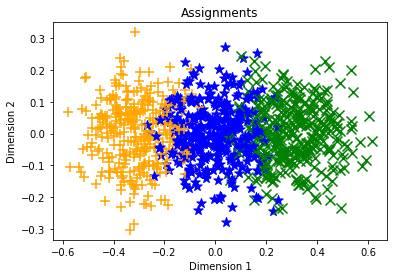

In [7]:
# see those cluster assignments with the 2-dimensional data points
def plot_clusters(samples, clusters):
    col_dic = {0:'blue', 1:'green', 2:'orange'}
    mrk_dic = {0:'*', 1:'x', 2:'+'}
    colors = [col_dic[x] for x in clusters]
    markers = [mrk_dic[x] for x in clusters]
    for sample in range(len(clusters)):
        plt.scatter(samples[sample][0],samples[sample][1], color=colors[sample], marker=markers[sample], s=100)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('Assignments')
    plt.show()
    
plot_clusters(data_2d, km_clusters)

### Agglomerative Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(data.values)
agg_clusters

array([1, 1, 0, 2, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0,
       1, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 2,
       0, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 0, 0,
       1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       2, 0, 2, 1, 1, 0, 1, 0, 2, 2, 0, 0, 0, 1, 0,

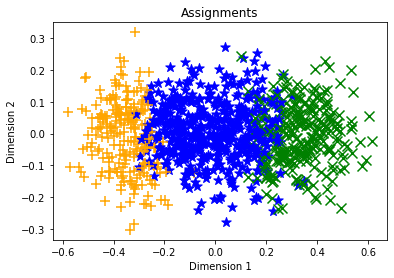

In [9]:
plot_clusters(data_2d, agg_clusters)